In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
import tsib.household.profiles

### Get plot style

In [3]:
data = tsorb.utils.InputData.DataExchangeCsv()

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

In [5]:
EXPORT_PATH = os.path.join('plots')

In [6]:
import matplotlib.colors as mcolors
def make_colormap(seq):
    """
    Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

In [7]:
rvb = make_colormap([np.array([2., 61., 100.])/255,
                     np.array([20., 129., 129.])/255,0.25,
                     np.array([20., 129., 129.])/255,
                     np.array([108., 139., 70.])/255,0.5,
                     np.array([108., 139., 70.])/255,
                     np.array([250.,150.,90.])/255,0.75,
                     np.array([250.,150.,90.])/255,
                     np.array([255.,192.,0.])/255, ])

### Plot state activity

In [8]:
residents = 2

In [9]:
day_of_week = 'wd'

In [10]:
num_row_jump = int((residents + 1)**2)

In [11]:
startstate = data.get_four_state_start_state[day_of_week][:,residents-1]

In [12]:
startprob = [] 
labels = []
for i in range(residents+1):
    for ii,state in enumerate(startstate[i*7:i*7+residents+1]):
        startprob.append(state)
        labels.append(str(i) + ' home and ' + str(ii) + ' active')
startprob = np.array(startprob)

In [13]:
act_transition = data.get_four_state_trans_data[day_of_week + str(residents)]

In [14]:
states = [startprob]
index = []
# loop over whole day
for interval in range(0, 144):     
    transition_prob = act_transition[num_row_jump * interval: 
                                     num_row_jump * (interval+1), 2:]
    index.append(float(interval)/6.)
    states.append(np.dot(states[interval],transition_prob))

In [15]:
np.array(states[1:]).shape

(144, 9)

In [16]:
len(index)

144

In [17]:
colorset = rvb(np.linspace(0, 1, len(labels)))

/home/leander/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


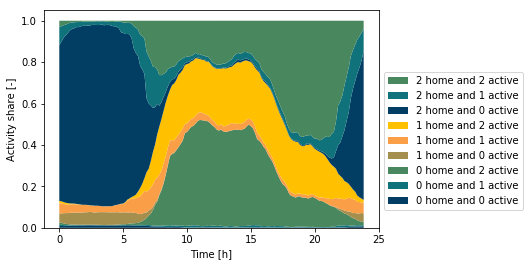

In [29]:
plt.figure()
ax = plt.subplot(1,1,1)


ax.stackplot(index,np.array(states[1:]).T, labels = labels, colors = colorset)


handles, labels = ax.get_legend_handles_labels()
ax.legend(list(reversed(handles)), list(reversed(labels)), loc='center left', ncol = 1, bbox_to_anchor=(1., 0.4))

ax.set_ylabel('Activity share [-]')
ax.set_xlabel('Time [h]')

#ax.legend(bbox_to_anchor=(1.0, 1.0),edgecolor = 'w', )

NAME = 'method_occActivity_'+ str(residents) + '_'+day_of_week

### Plot activity type

In [19]:
activity = data.get_activities

In [20]:
df = pd.DataFrame(activity,columns = ['day','occ','activity'] + index )

In [21]:
df.loc[df['day']==0,'day'] = 'wd'
df.loc[df['day']==1,'day'] = 'we'

In [22]:
df = df.set_index(['day','occ'])

Select day and occ

In [23]:
residents = 3

In [24]:
day_of_week = 'we'

In [25]:
activity = df.loc[(day_of_week,residents)].set_index(['activity'])

activity.loc['Other',:] = residents - activity.sum()

In [26]:
activity.index = activity.index.str.replace('Act_','')
activity.index = activity.index.str.replace('WashDress','Washing/\nDressing')
activity.index = activity.index.str.replace('HouseClean','House\ncleaning')

In [27]:
colorset = rvb(np.linspace(0, 1, len(activity.index)))

/home/leander/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:194: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/home/leander/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


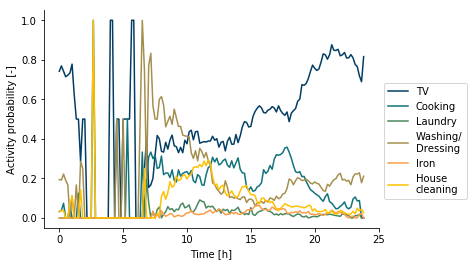

In [30]:
plt.figure()
ax = plt.subplot(1,1,1)


activity.T.plot(colors = colorset, ax = ax)

ax.set_xlabel('Time [h]')
ax.set_ylabel('Activity probability [-]')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='center left', ncol = 1, bbox_to_anchor=(1., 0.4))

NAME = 'method_activityProbability_'+ str(residents) + '_'+day_of_week